In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
fraud=pd.read_csv('fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.info() # null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.duplicated().sum() # no duplicate values

0

In [5]:
fraud1=fraud.drop(['City.Population'],axis=1)
fraud1


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [6]:
le=preprocessing.LabelEncoder()
fraud1['Undergrad']=le.fit_transform(fraud1['Undergrad'])
fraud1['Urban']=le.fit_transform(fraud1['Urban'])
fraud1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,Single,68833,10,1
1,1,Divorced,33700,18,1
2,0,Married,36925,30,1
3,1,Single,50190,15,1
4,0,Married,81002,28,0
...,...,...,...,...,...
595,1,Divorced,76340,7,1
596,1,Divorced,69967,2,1
597,0,Divorced,47334,0,1
598,1,Married,98592,17,0


In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(fraud1[['Marital.Status']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
encoded_cols = enc.fit_transform(fraud1[['Marital.Status']]).toarray()
encoded_cols = pd.DataFrame(encoded_cols, columns=enc.get_feature_names_out(['Marital.Status']))
data = pd.concat([fraud1, encoded_cols], axis=1)


In [9]:
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,Single,68833,10,1,0.0,0.0,1.0
1,1,Divorced,33700,18,1,1.0,0.0,0.0
2,0,Married,36925,30,1,0.0,1.0,0.0
3,1,Single,50190,15,1,0.0,0.0,1.0
4,0,Married,81002,28,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
595,1,Divorced,76340,7,1,1.0,0.0,0.0
596,1,Divorced,69967,2,1,1.0,0.0,0.0
597,0,Divorced,47334,0,1,1.0,0.0,0.0
598,1,Married,98592,17,0,0.0,1.0,0.0


In [10]:
data1=data.drop(['Marital.Status'],axis=1)
data1

,Undergrad,Taxable.Income,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,10,1,0.0,0.0,1.0
1,1,33700,18,1,1.0,0.0,0.0
2,0,36925,30,1,0.0,1.0,0.0
3,1,50190,15,1,0.0,0.0,1.0
4,0,81002,28,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
595,1,76340,7,1,1.0,0.0,0.0
596,1,69967,2,1,1.0,0.0,0.0
597,0,47334,0,1,1.0,0.0,0.0
598,1,98592,17,0,0.0,1.0,0.0


# Converting Taxable.Income data into 2 categories "Risky" and others are "Good" by binning sales columns

In [11]:
 max(data1['Taxable.Income'])

99619

In [12]:
data1["Fraud_check"] = pd.cut(data["Taxable.Income"], bins=[0, 30000,max(data['Taxable.Income'])], labels=["Risky", "Good"])
data1["Fraud_check"] 

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Fraud_check, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [13]:
data1

,Undergrad,Taxable.Income,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Fraud_check
0,0,68833,10,1,0.0,0.0,1.0,Good
1,1,33700,18,1,1.0,0.0,0.0,Good
2,0,36925,30,1,0.0,1.0,0.0,Good
3,1,50190,15,1,0.0,0.0,1.0,Good
4,0,81002,28,0,0.0,1.0,0.0,Good
...,...,...,...,...,...,...,...,...
595,1,76340,7,1,1.0,0.0,0.0,Good
596,1,69967,2,1,1.0,0.0,0.0,Good
597,0,47334,0,1,1.0,0.0,0.0,Good
598,1,98592,17,0,0.0,1.0,0.0,Good


In [14]:
data2=data1.drop(['Taxable.Income'],axis=1)
data2


,Undergrad,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Fraud_check
0,0,10,1,0.0,0.0,1.0,Good
1,1,18,1,1.0,0.0,0.0,Good
2,0,30,1,0.0,1.0,0.0,Good
3,1,15,1,0.0,0.0,1.0,Good
4,0,28,0,0.0,1.0,0.0,Good
...,...,...,...,...,...,...,...
595,1,7,1,1.0,0.0,0.0,Good
596,1,2,1,1.0,0.0,0.0,Good
597,0,0,1,1.0,0.0,0.0,Good
598,1,17,0,0.0,1.0,0.0,Good


In [15]:
Fraud_dataa=data2

In [16]:
Fraud_dataa['Fraud_check'].value_counts() #the data is not balanced

Good     476
Risky    124
Name: Fraud_check, dtype: int64

In [17]:
x=Fraud_dataa.iloc[:,0:-1]
y=Fraud_dataa.iloc[:,-1]

In [18]:
x

,Undergrad,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,10,1,0.0,0.0,1.0
1,1,18,1,1.0,0.0,0.0
2,0,30,1,0.0,1.0,0.0
3,1,15,1,0.0,0.0,1.0
4,0,28,0,0.0,1.0,0.0
...,...,...,...,...,...,...
595,1,7,1,1.0,0.0,0.0
596,1,2,1,1.0,0.0,0.0
597,0,0,1,1.0,0.0,0.0
598,1,17,0,0.0,1.0,0.0


In [19]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Fraud_check, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

# Building Decision Tree Classifier using gini Criteria

In [21]:
model=DecisionTreeClassifier(criterion='gini', min_samples_split=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

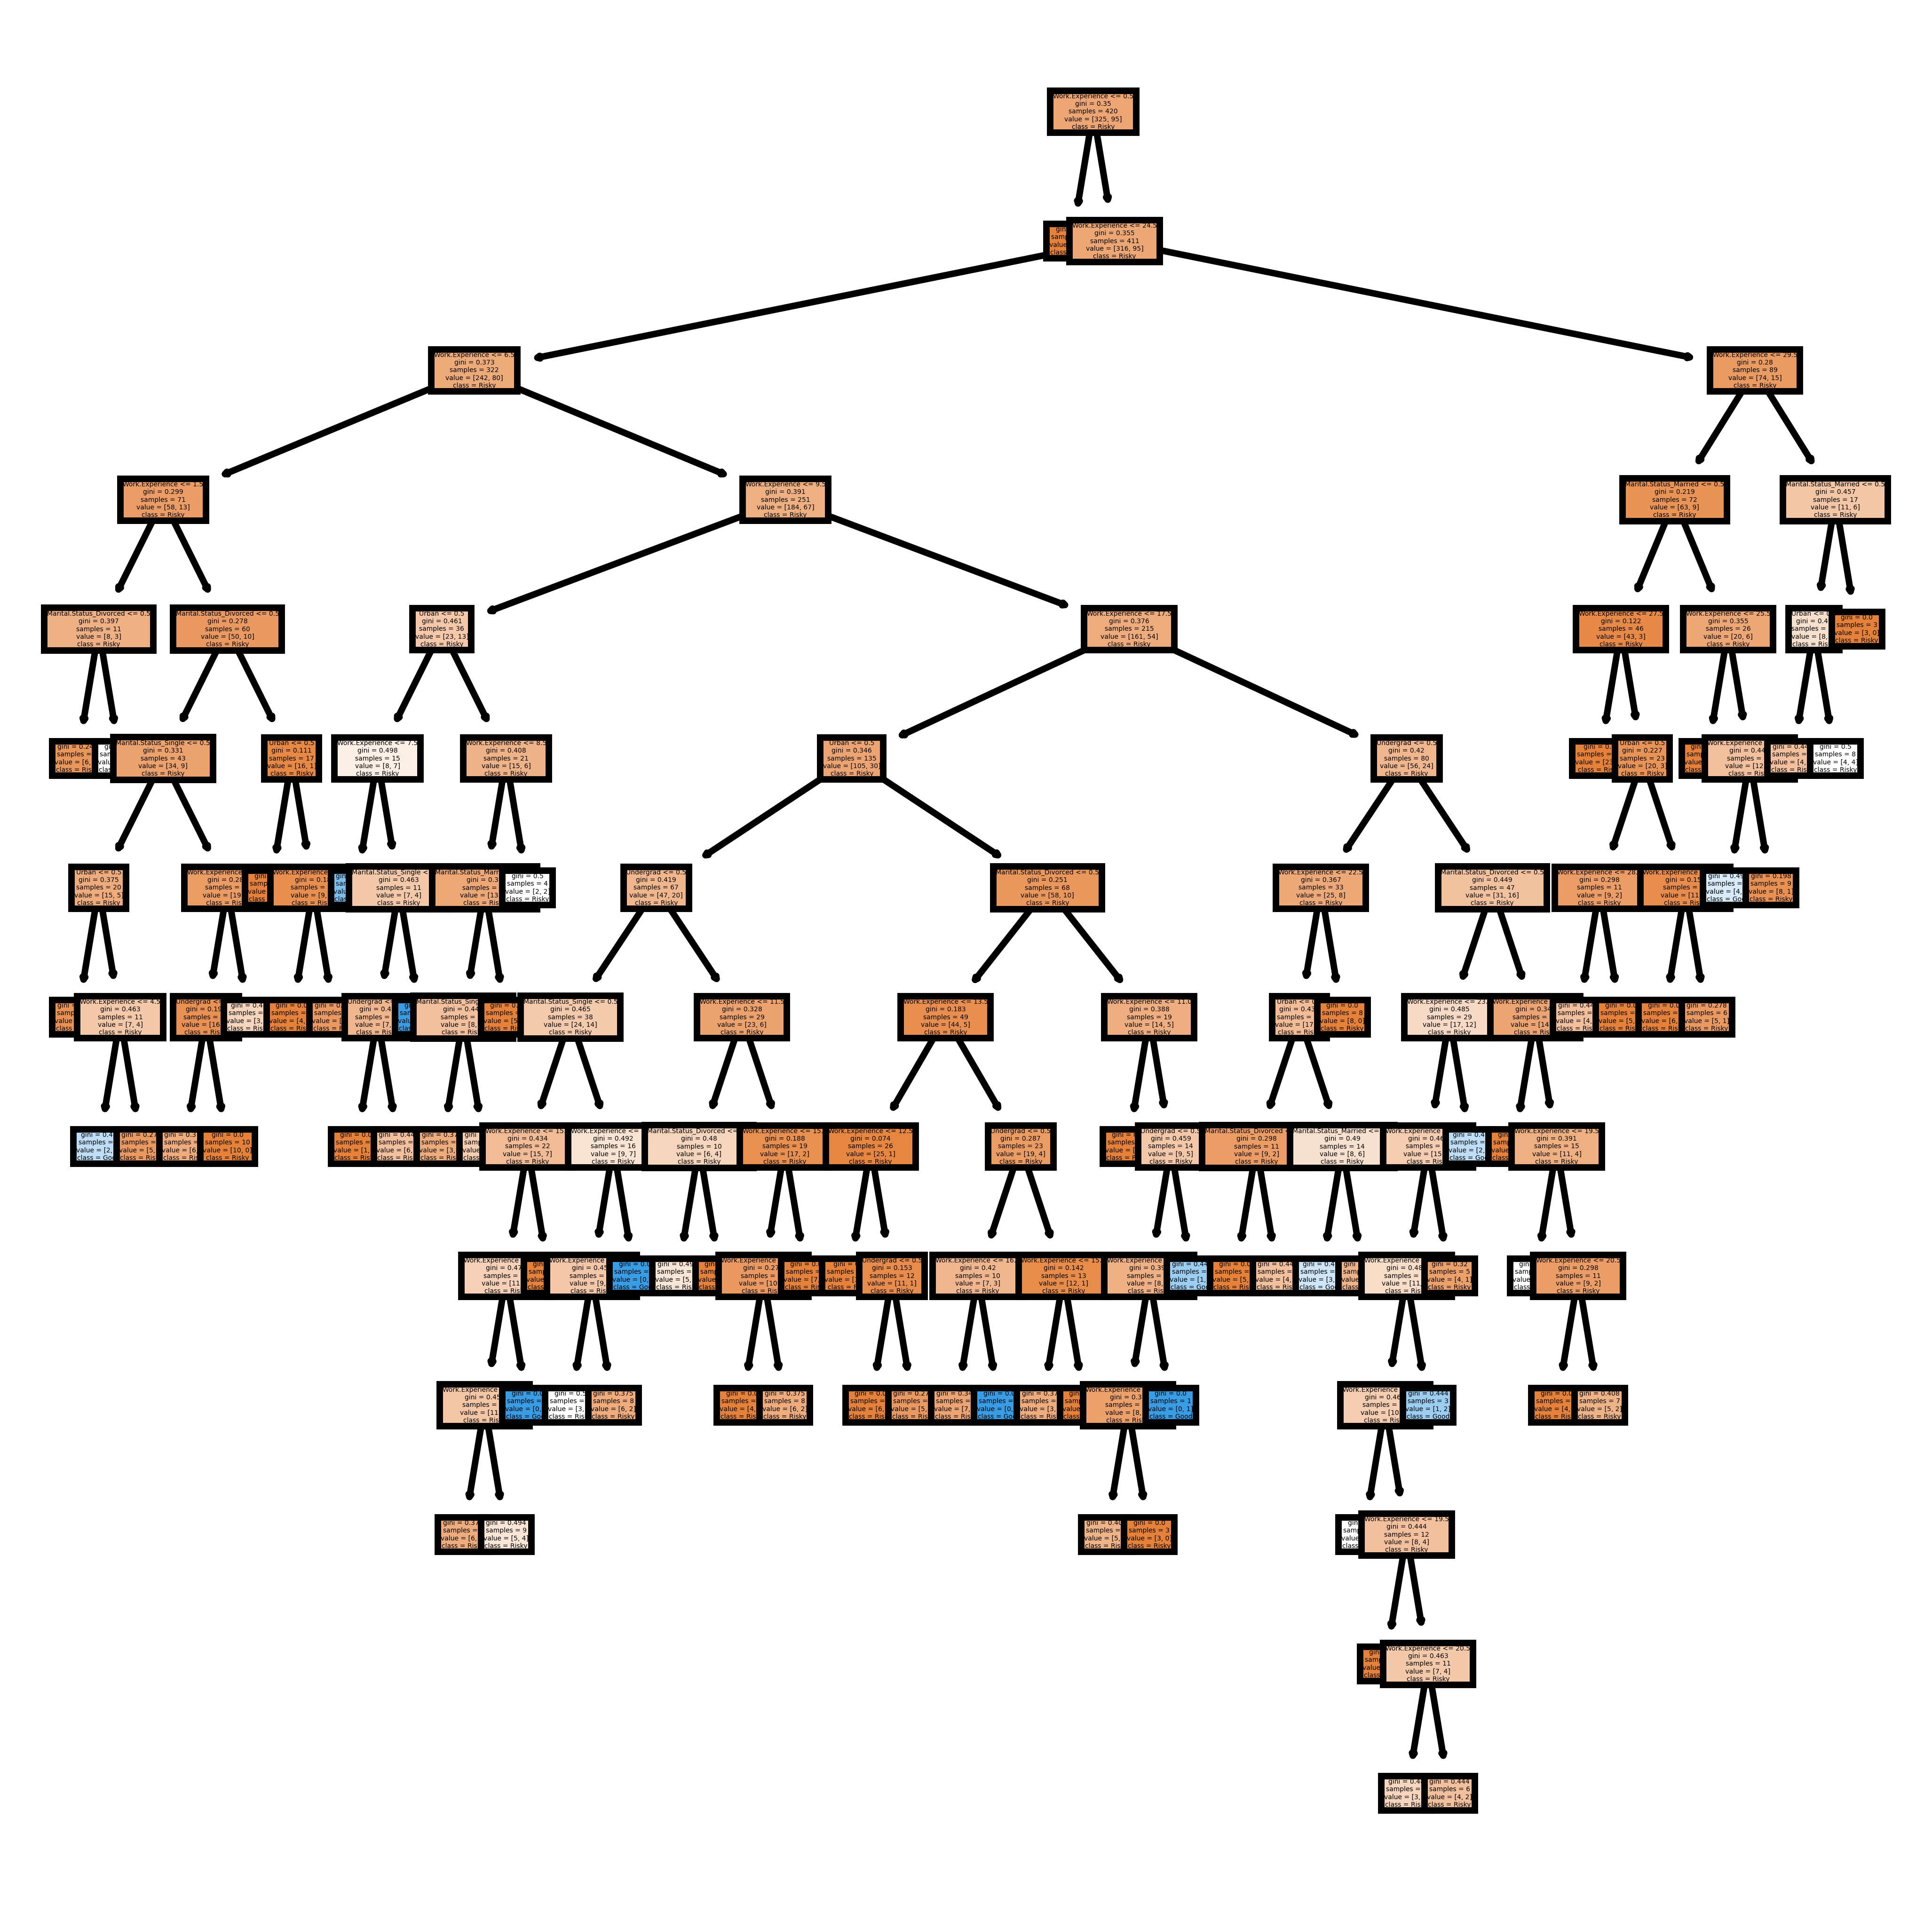

In [22]:
fn=['Undergrad','Work.Experience','Urban','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good     155
Risky     25
dtype: int64

In [24]:
metrics.accuracy_score(preds,y_test)

0.7777777777777778

In [25]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       0.88      0.86      0.87       155
       Risky       0.24      0.28      0.26        25

    accuracy                           0.78       180
   macro avg       0.56      0.57      0.56       180
weighted avg       0.79      0.78      0.78       180



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

array([[133,  18],
       [ 22,   7]], dtype=int64)

# Building Decision Tree Classifier (CART) using entropyCriteria

In [27]:
model_2=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=5)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

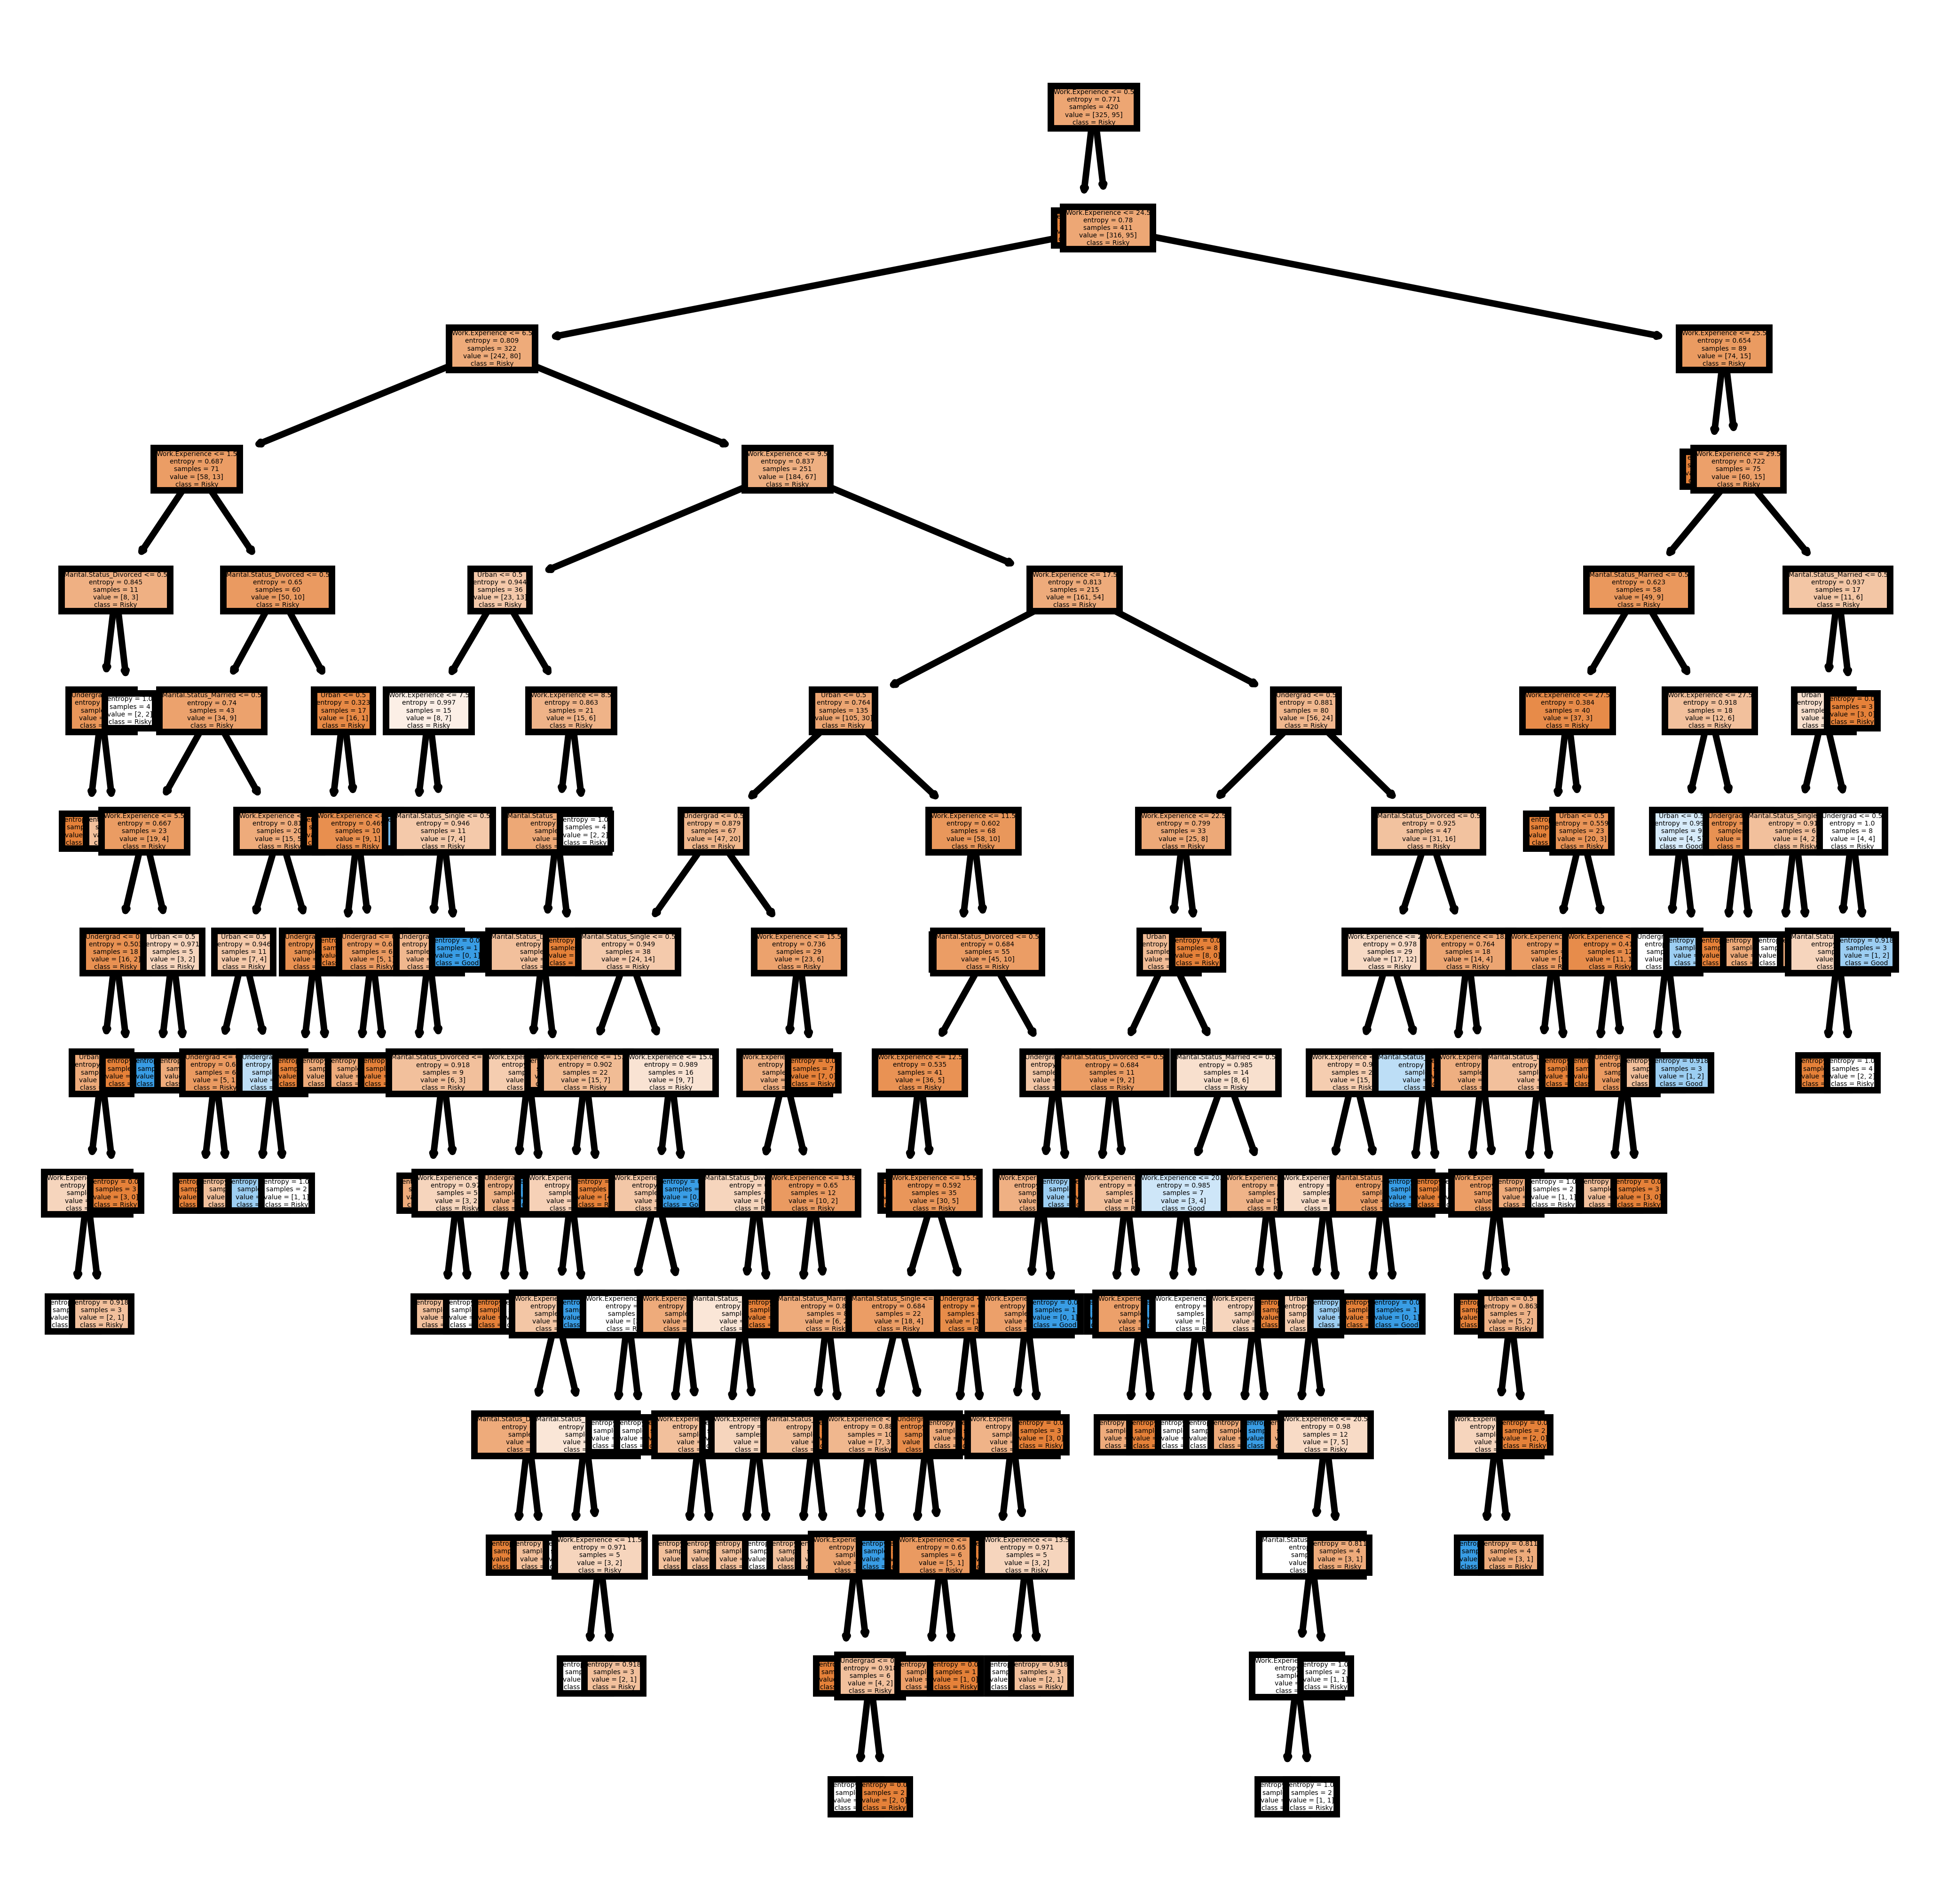

In [28]:
fn=['Undergrad','Work.Experience','Urban','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(model_2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
pred_1=model_2.predict(x_test)
pd.Series(pred_1).value_counts()

Good     154
Risky     26
dtype: int64

In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.86      0.88      0.87       151
       Risky       0.28      0.24      0.26        29

    accuracy                           0.78       180
   macro avg       0.57      0.56      0.56       180
weighted avg       0.76      0.78      0.77       180



In [31]:
print(confusion_matrix(y_test,preds))

[[133  18]
 [ 22   7]]


A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [33]:
companydata=pd.read_csv("Company_Data.csv")

In [34]:
companydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [35]:
companydata.duplicated().sum() # no duplicate values

0

In [36]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with a categorical variable
df =companydata
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit and transform the categorical variable using the fit_transform method
df['ShelveLoc'] = le.fit_transform(companydata['ShelveLoc'])
df['Urban'] = le.fit_transform(companydata['Urban'])
df['US'] = le.fit_transform(companydata['US'])
# Print the resulting dataframe
print(df)


     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  

In [38]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [39]:
df1 =df

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Fit and transform the continuous variable using the fit_transform method
df['CompPrice'] = scaler.fit_transform(df[['CompPrice']])
df['Advertising'] = scaler.fit_transform(df[['Advertising']])
df['Price'] = scaler.fit_transform(df[['Price']])
df['Income'] = scaler.fit_transform(df[['Income']])
df['Population'] = scaler.fit_transform(df[['Population']])
df['Age'] = scaler.fit_transform(df[['Age']])
df['Education'] = scaler.fit_transform(df[['Education']])
# Print the resulting dataframe
print(df1)


     Sales  CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     9.50   0.622449  0.525253     0.379310    0.533066  0.574850          0   
1    11.22   0.346939  0.272727     0.551724    0.501002  0.353293          1   
2    10.06   0.367347  0.141414     0.344828    0.519038  0.335329          2   
3     7.40   0.408163  0.797980     0.137931    0.913828  0.437126          2   
4     4.15   0.653061  0.434343     0.103448    0.661323  0.622754          0   
..     ...        ...       ...          ...         ...       ...        ...   
395  12.57   0.622449  0.878788     0.586207    0.386774  0.622754          1   
396   6.14   0.632653  0.020202     0.103448    0.054108  0.574850          2   
397   7.41   0.867347  0.050505     0.413793    0.717435  0.808383          2   
398   5.94   0.234694  0.585859     0.241379    0.549098  0.425150          0   
399   9.71   0.581633  0.161616     0.000000    0.034068  0.574850          1   

          Age  Education  U

In [40]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,11.22,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,10.06,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,7.40,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,4.15,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,6.14,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,7.41,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,5.94,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


# Converting sales data into 4 categories 'Excellent','Good','Average','Poor' by binning sales columns

In [41]:
#bins = np.linspace(min(df1['Sales']), max(df1['Sales']), 5)
#bins

In [42]:
#df1['Sales'] = pd.cut(df1['Sales'], bins=[-0.1 ,  4.0675,  8.135 , 12.2025, 16.27  ],labels=['Poor','Average','Good','Excellent'])

In [43]:
#df1

In [44]:
#df1['Sales'].isnull().value_counts()

In [45]:
# Create a sample dataframe with a categorical variable
#df2 =df1
 #Create an instance of the LabelEncoder class
#le = LabelEncoder()

 #Fit and transform the categorical variable using the fit_transform method
#df2['Sales'] = le.fit_transform(companydata['Sales'])
 #Print the resulting dataframe
#print(df2)


In [46]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [47]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


In [48]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [49]:
y.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [50]:
y.isnull().value_counts()

False    400
Name: Sales, dtype: int64

In [51]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)

In [53]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(max_depth=3,min_samples_split=5)
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [54]:
#finding the MSE
pred3=model3.predict(x_test)
metrics.mean_squared_error(y_test,pred3)


3.8736648828365032

In [55]:
metrics.mean_absolute_percentage_error(y_test,pred3)

0.21915721746423786

In [56]:
np.mean(np.abs(y_test-pred3)/np.array(y_test))

0.21915721746423794

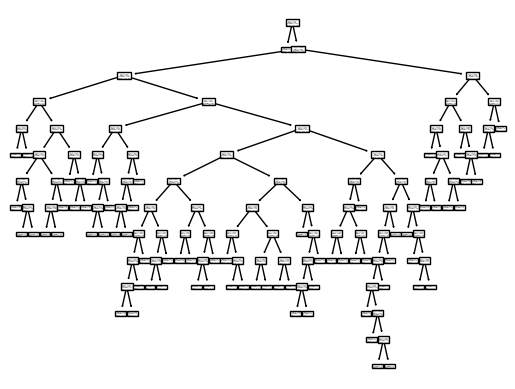

In [57]:
tree.plot_tree(model)
import warnings
warnings.filterwarnings('ignore')

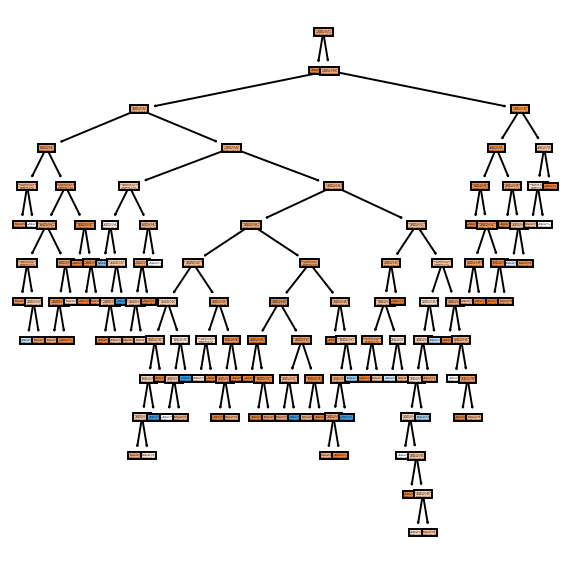

In [58]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=140)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [59]:
model3.score(x_test,y_test)

0.40123730127534885